In [1]:
# import required libraries
from fastai.vision.all import *
from fastai.callback.core import Callback

In [2]:
# set path to the directory containing data
path = Path('Fabric Dataset-20230617T011229Z-001/Fabric Dataset/non-augmented-img')
IMG_SIZE = 150

In [3]:
# Define the labels
labels = [parent_label(img) for img in get_image_files(path)]

In [4]:
# define function to create dataset
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       splitter=RandomSplitter(valid_pct = 0.2, seed = 42),
                       get_y=parent_label,
                       item_tfms=[Resize(IMG_SIZE, ResizeMethod.Pad)],
                       batch_tfms=[Normalize()])
dls = dblock.dataloaders(path, batch_size=64)

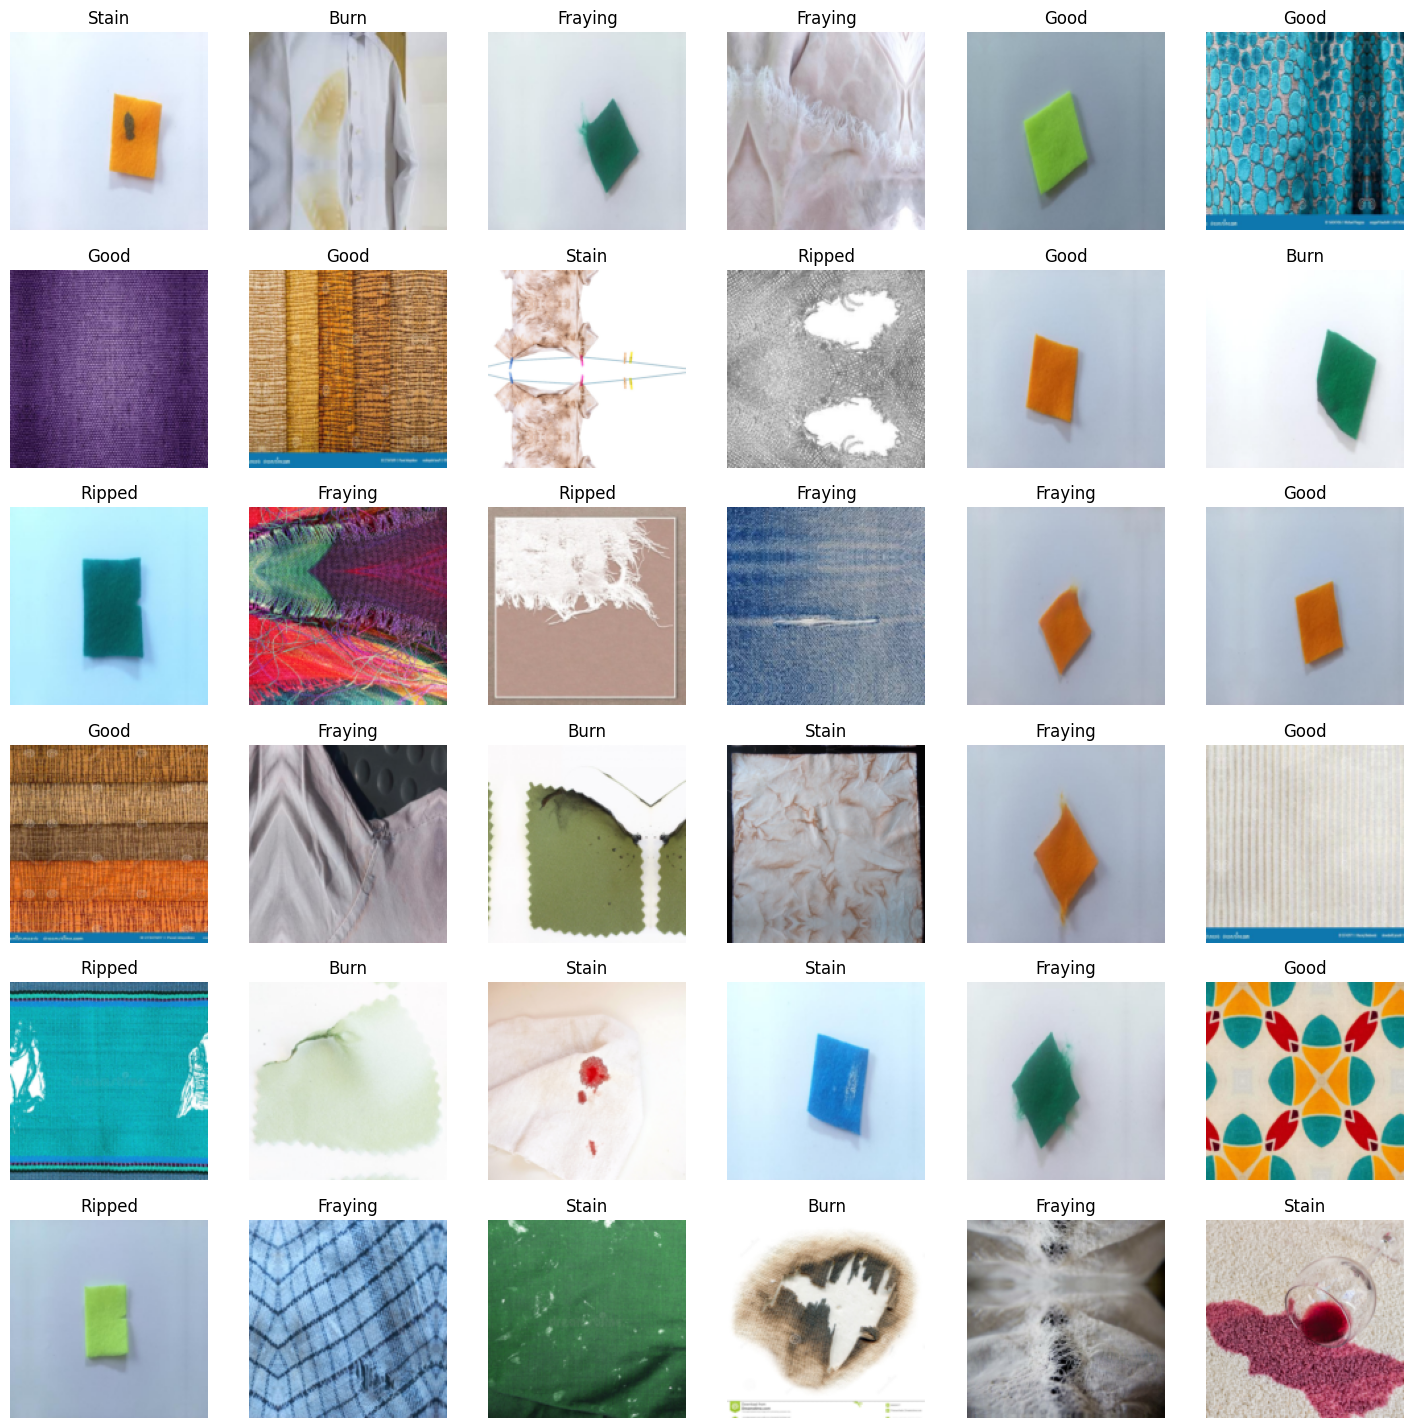

In [5]:
dls.show_batch(max_n=36)

In [6]:
print(dls.train.one_batch()[0].shape)

torch.Size([64, 3, 150, 150])


In [7]:
dls.vocab

['Burn', 'Fraying', 'Good', 'Ripped', 'Stain']

In [8]:
dls.valid.n

130

In [12]:
learn = vision_learner(dls, resnet50, metrics=[error_rate,accuracy], 
                       loss_func = CrossEntropyLossFlat(),cbs=[GradientAccumulation(n_acc=4), ShowGraphCallback(),  
                        EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)], pretrained=true)

SuggestedLRs(valley=0.0003981071640737355)

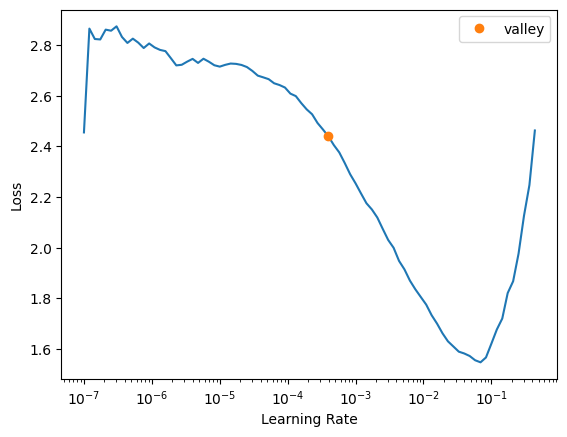

In [10]:
learn.lr_find()

<b> Fine Tune with Traceback <b>
    <p> Fine tuning is one of the technique that used on deep learning task. 
        The model that we fine-tune is ResNet50. For doing fine tuning we can run <b>learn.fine_tune(epochs,learning_rate)<b>.<p> 

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.846839,2.071552,0.807692,0.192308,01:55
1,2.566117,1.634808,0.707692,0.292308,02:05
2,2.245237,1.321100,0.484615,0.515385,02:03
3,1.924722,1.180832,0.392308,0.607692,02:04
4,1.637269,1.102774,0.353846,0.646154,02:04


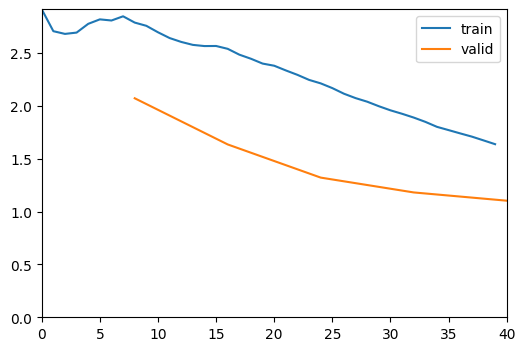

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.739093,1.084673,0.338462,0.661538,02:47
1,0.647012,1.098227,0.353846,0.646154,02:45
2,0.602780,1.053941,0.346154,0.653846,02:45
3,0.533571,1.004986,0.330769,0.669231,02:44
4,0.471737,0.954849,0.346154,0.653846,02:54
5,0.408296,0.952037,0.307692,0.692308,02:46
6,0.353074,0.948741,0.300000,0.700000,02:43
7,0.311145,0.962775,0.307692,0.692308,02:42


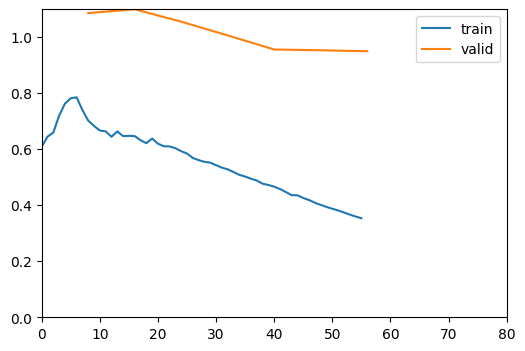

No improvement since epoch 4: early stopping


In [13]:
import traceback

try:
    learn.fine_tune(10, freeze_epochs = 5, base_lr=0.0004)
except Exception as e:
    print(traceback.format_exc())

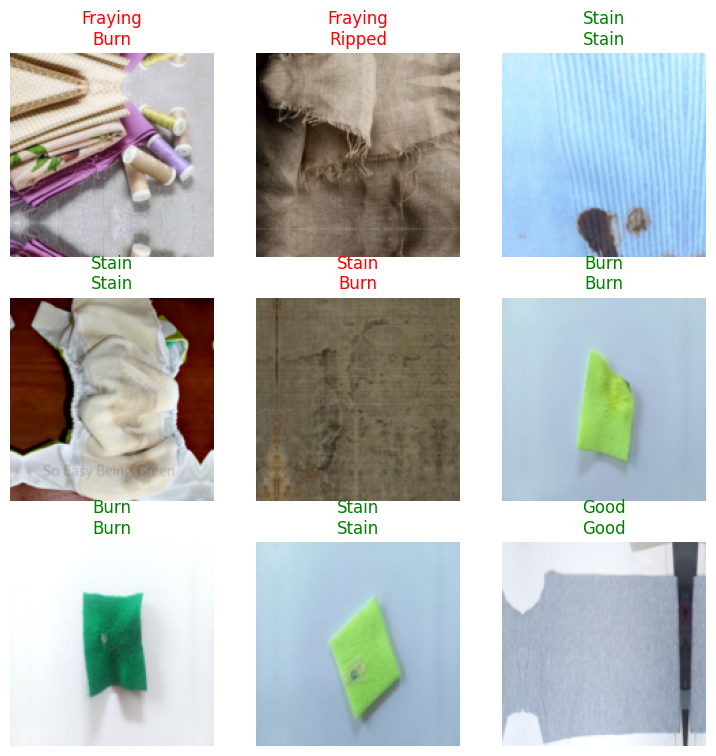

In [14]:
learn.show_results()

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

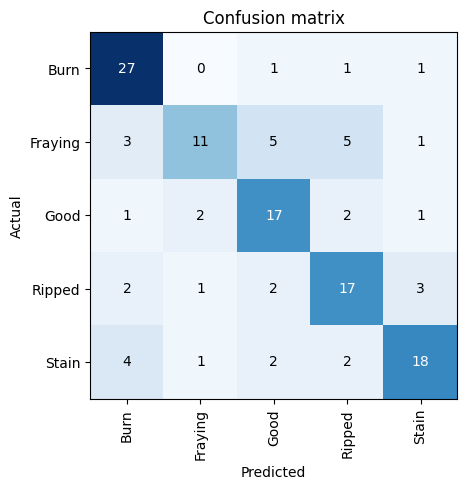

In [16]:
interp.plot_confusion_matrix()

In [47]:
learn.export('ModelFabric-RandSplit-1Jul2023.pkl')

In [48]:
learn_inf = load_learner('ModelFabric-RandSplit-1Jul2023.pkl')

In [49]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 6.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 6.jpeg')

('Ripped', TensorBase(3), TensorBase([0.0050, 0.0119, 0.0010, 0.9786, 0.0035]))

In [50]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 5.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 5.jpeg')

('Burn', TensorBase(0), TensorBase([0.8787, 0.0018, 0.0603, 0.0147, 0.0445]))

In [51]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 4.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 4.jpeg')

('Fraying',
 TensorBase(1),
 TensorBase([0.0090, 0.6292, 0.3199, 0.0198, 0.0221]))

In [52]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 3.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 3.jpeg')

('Burn', TensorBase(0), TensorBase([0.4696, 0.0452, 0.3207, 0.0088, 0.1558]))

In [53]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/test image 2.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/test image 2.jpeg')

('Burn', TensorBase(0), TensorBase([0.7103, 0.0153, 0.1560, 0.0292, 0.0892]))

In [38]:
from PIL import Image
img = Image.open('Fabric Dataset-20230617T011229Z-001/Fabric Dataset/Valid/Stain/image_aug_1_13.jpg')
img.show()
learn_inf.predict('Fabric Dataset-20230617T011229Z-001/Fabric Dataset/Valid/Stain/image_aug_1_13.jpg')

('Good', TensorBase(2), TensorBase([0.0179, 0.0173, 0.4285, 0.1268, 0.4095]))

In [54]:
from PIL import Image
img = Image.open('Fabric Dataset/test image/WhatsApp Image 2023-06-26 at 14.51.52.jpeg')
img.show()
learn_inf.predict('Fabric Dataset/test image/WhatsApp Image 2023-06-26 at 14.51.52.jpeg')

('Stain', TensorBase(4), TensorBase([0.0099, 0.0135, 0.0036, 0.2330, 0.7399]))

In [55]:
from PIL import Image
img = Image.open('Fabric Dataset/Unseen Images/Ripped/20230701_124939.jpg')
img.show()
learn_inf.predict('Fabric Dataset/Unseen Images/Ripped/20230701_124939.jpg')

('Ripped',
 TensorBase(3),
 TensorBase([1.1034e-04, 6.7983e-06, 3.4394e-04, 9.8306e-01, 1.6479e-02]))